[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/thawn/ttt-workshop-cnn/blob/main/book/slides/lecture_slides.ipynb)

# Slides: Convolutional Neural Networks (20 min)

Use Presentation mode.

- Convolutions
- Pooling
- U-Net
- Microscopy use cases
- Teaching methods

In [1]:
import numpy as np
from IPython.display import HTML
import matplotlib.pyplot as plt

from ttt_workshop_cnn import utils

In [2]:
smiley = utils.draw_smiley()
kernel = utils.draw_gaussian_kernel(size=3, sigma=1)

## Under the hood of CNNs

Convolution is defined as:

$(I * K)(i, j) = \sum_m \sum_n I(m, n) K(i - m, j - n)$

In [3]:
animation = utils.animate_convolution(smiley, kernel, interval=200); HTML(animation.to_jshtml())

Note how the output is smaller than the input. This can be avoided using padding

## Padding keeps input and output dimensions identical

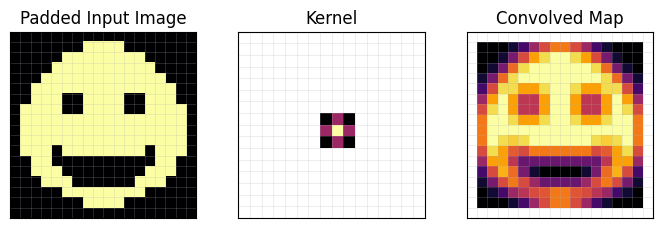

In [4]:
padded_smiley = np.pad(smiley, pad_width=1, mode='constant', constant_values=0); _ = utils.plot_input_kernel_output(padded_smiley, kernel, titles=("Padded Input Image", "Kernel", "Convolved Map"))

## Padding mode `reflect`

often causes less artefacts

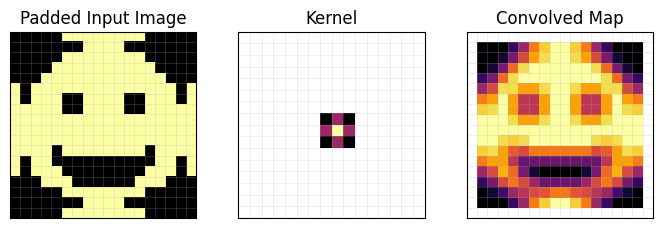

In [5]:
padded_smiley = np.pad(smiley, pad_width=1, mode='reflect'); _ = utils.plot_input_kernel_output(padded_smiley, kernel, titles=("Padded Input Image", "Kernel", "Convolved Map"))

In [6]:
padded_smiley = np.pad(smiley, pad_width=1, mode="constant", constant_values=0)

## Stride determines how far the kernel moves between iterations

In [7]:
animation = utils.animate_convolution(padded_smiley, utils.draw_sobel_kernel(), stride=2, interval=200)
HTML(animation.to_jshtml())

## $n$ kernels create $n$ feature maps

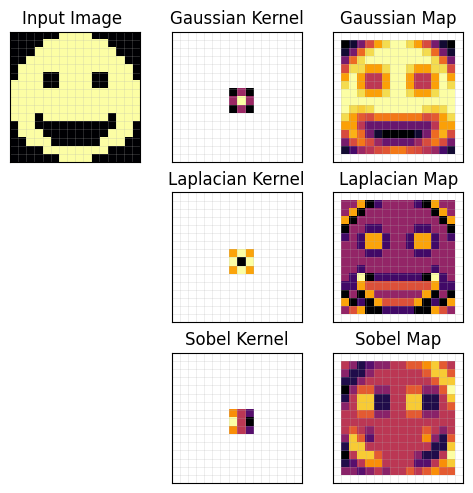

In [8]:
_ = utils.plot_three_kernels(smiley, [kernel, utils.draw_laplacian_kernel(), utils.draw_sobel_kernel()])

## The receptive field limits the amount of context a CNN can learn

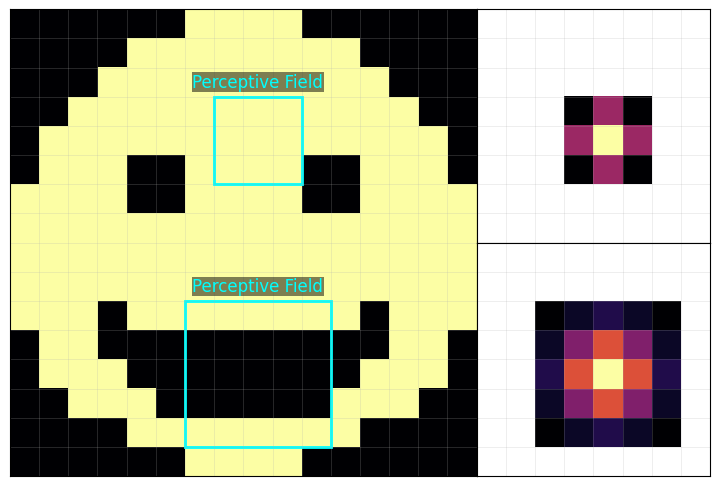

In [9]:
utils.plot_perceptive_field(smiley, kernel_layers=1, kernel_sizes=(3,5))

## Receptive fields of consecutive layers stack up

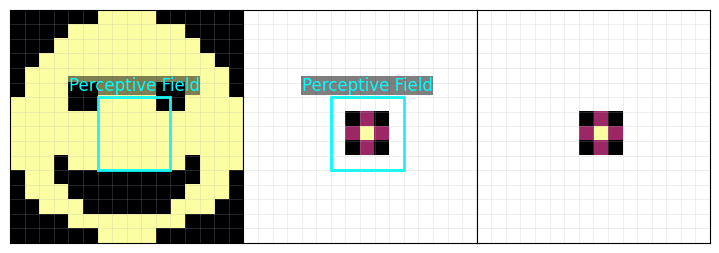

In [10]:
utils.plot_perceptive_field(smiley, kernel_layers=2, kernel_sizes=(3,))


## Adding 3x3 layers is more parameter efficient than increasing kernel size

|Perceptive field   | Larger Kernel         | Multiple 3x3 kernels          |
|-------------------|-----------------------|-------------------------------|
| 5 x 5             | $5^2 = 25$ parameters | $2 \cdot 3^2 = 18$ parameters |
| 7 x 7             | $7^2 = 49$ parameters | $3 \cdot 3^2 = 27$ parameters |
|                   | quadratic             | linear                        |

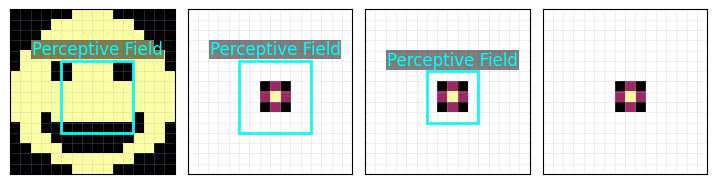

In [11]:
utils.plot_perceptive_field(smiley, kernel_layers=3, kernel_sizes=(3,))